# Digital Signal and Image Management

## Assignment #2

Implementare la funzione di sharpening per esaltare i dettagli di un'immagine in scala di grigi tramite unsharp mask, partendo dalle istruzioni viste ad esercitazione.
Verificare l'effetto di diversi parametri coinvolti nelle operazioni utilizzate.

### Packages

In [2]:
import numpy as np

# Gestione immagini
from skimage import io # Per input/output
from skimage import transform # Per trasformazioni geometriche (es. resize)
from skimage import filters # Per filtri locali
from skimage import color # Per cambi colore

# Visualizzazione e interazione
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

%matplotlib inline

Iniziamo innanzitutto importando i pacchetti necessari e la nostra immagine di riferimento

In [3]:
lena = io.imread('images/lena.jpg', as_gray = True)

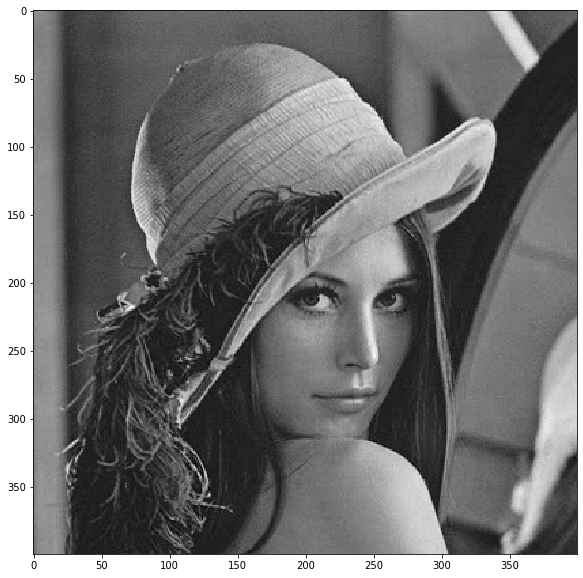

In [13]:
plt.figure(figsize = (10,10))
plt.imshow(lena, cmap = 'gray')

Il sharpening di un immagine consiste essenzialmente in 3 operazioni:
* Operazione di blurring dell'immagine, ovvero diminuire i dettagli
* Una volta ricavata un'immagine privata dei dettagli provvedere a sottrarla all'immagine originale così da isolare i dettagli dell'mmagine stessa
* Una volta isolati i dettagli dell'immagine sommarli all'immagine iniziale così da "aumentarli"

In quest'ottica applichiamo un filtro gaussiano alla nostra immagine così da ricavare l'immagine privata dei dettagli, poi produciamo come detto la differenza ed infine sommiamo i dettagli isolati all'immagine originale.

In [70]:
gaus = filters.gaussian(lena, sigma = 50, preserve_range = True)
diff = lena - gaus
rec = lena + diff
rec = np.where(rec < 0, 0, rec)
rec = np.where(rec > 1, 1, rec)

A questo punto possiamo verificare le misure della nostra immagine originale e di quella *enhanced* con riferimento anche ai prodotti intermedi.

In [71]:
print(lena.shape, np.max(lena), np.min(lena))
print(gaus.shape, np.max(gaus), np.min(gaus))
print(diff.shape, np.max(diff), np.min(diff))
print(rec.shape, np.max(rec), np.min(rec))

(400, 400) 0.8989145098039216 0.019776862745098038
(400, 400) 0.5122065020519065 0.21432970125388415
(400, 400) 0.6016428574273418 -0.40407574571043614
(400, 400) 1.0 0.0


Plottiamo la distribuzione dei valori dei nostri pixel in modo da verificare quali elementi dell'immagine vengono "aumentati"

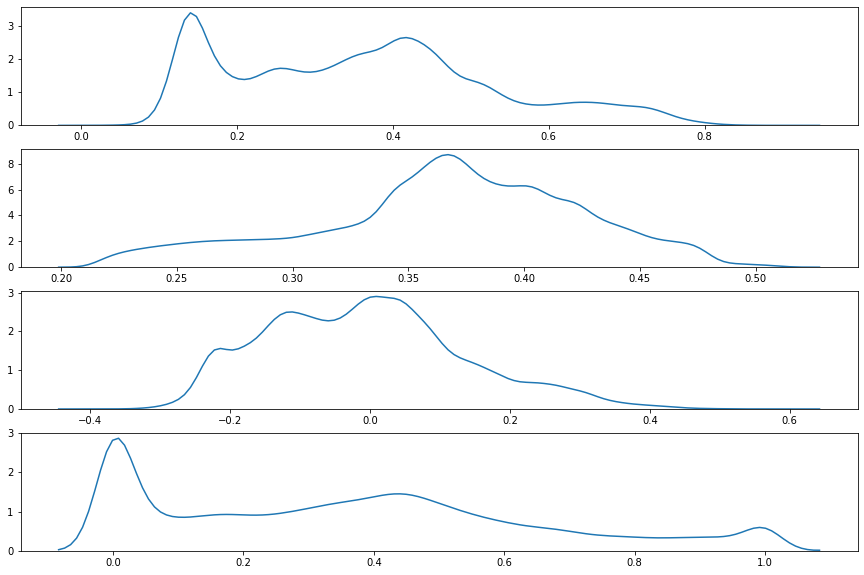

In [72]:
f, axes = plt.subplots(4, 1, figsize = (15,10))
sns.distplot(lena.reshape((lena.shape[0]*lena.shape[1])), hist = False, ax = axes[0])
sns.distplot(gaus.reshape((lena.shape[0]*lena.shape[1])), hist = False, ax = axes[1])
sns.distplot(diff.reshape((lena.shape[0]*lena.shape[1])), hist = False, ax = axes[2])
sns.distplot(rec.reshape((lena.shape[0]*lena.shape[1])), hist = False, ax = axes[3])

Come si può vedere dalle distribuzioni la parte degli "scuri" dell'immagine riceve un improvement considerevole, non resta altro che plottare le immagini ed i loro prodotti intermedi per verificare l'impatto dello *sharpening* sull'immagine originale.

Text(0.5, 1.0, 'Enhanced')

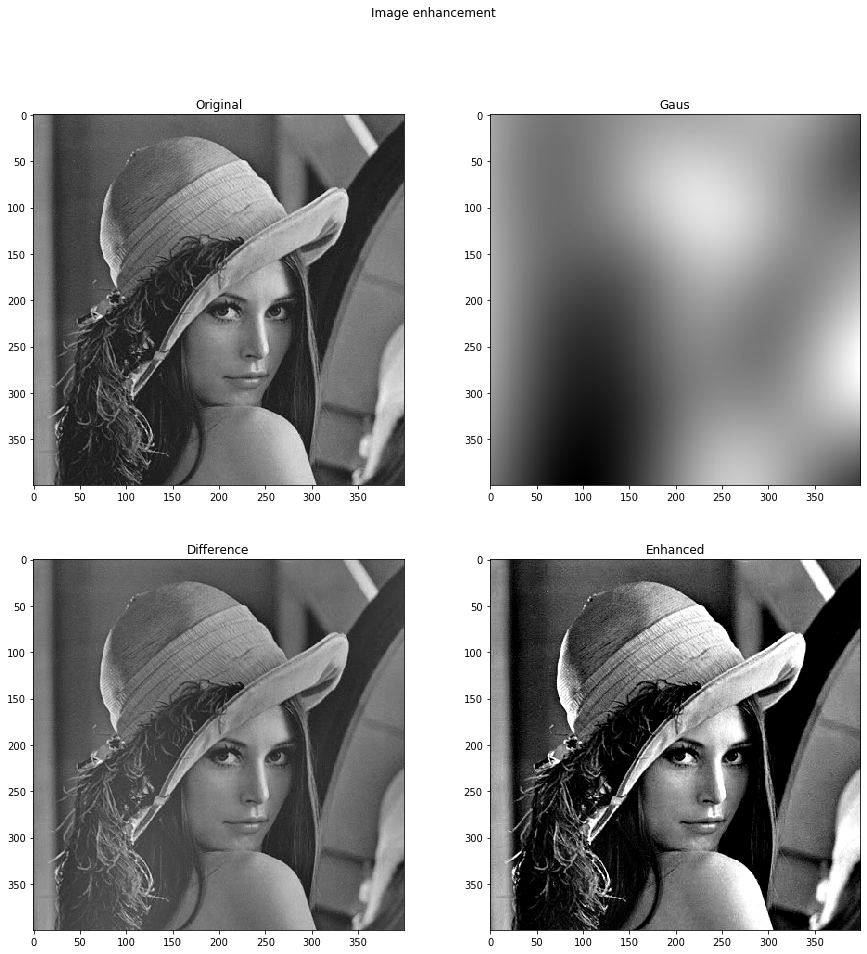

In [73]:
f, axes = plt.subplots(2,2, figsize = (15,15))
f.suptitle("Image enhancement")
axes[0][0].imshow(lena, cmap = 'gray')
axes[0][0].set_title('Original')
axes[0][1].imshow(gaus, cmap = 'gray')
axes[0][1].set_title("Gaus")
axes[1][0].imshow(diff, cmap = 'gray')
axes[1][0].set_title("Difference")
axes[1][1].imshow(rec, cmap = 'gray')
axes[1][1].set_title("Enhanced")

Testiamo altri parametri per lo sharpening così da verificarne l'impatto sulla nostra immagine di riferimento